
# MACHINE VISION AND IMAGE PROCESSING 
# ASSIGNMENT 3
# SEMESTER 4

## 190528J
## RODRIGO M.D.A.C.

# Connected Component Analysis
In this part, we will generate an indexed image representing connected components in conveyor_f101.png image. Notice that, as there are three square nuts and one hexagonal nut in the image, there will be five connected components (backgound will be assigned the label 0).

1. Open the hexnut_template.png, squarenut_template.png and conveyor_f100.png and display. This is done for you.

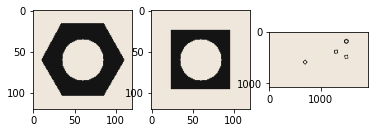

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

1.Convert the images to grayscale and apply Otsu's thresholding to obtain the binarized image. Do this for both the templates and belt images. See https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html for a guide. State the threshold value (automatically) selected in the operation. Display the output images.

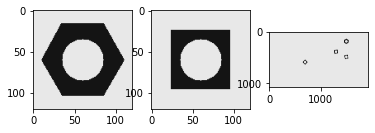

In [2]:
#Turning into grayscale images
hexnut_gray=cv.cvtColor(hexnut_template,cv.COLOR_BGR2GRAY)
squarenut_gray=cv.cvtColor(squarenut_template,cv.COLOR_BGR2GRAY)
conveyor_gray=cv.cvtColor(conveyor_f100,cv.COLOR_BGR2GRAY)
fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_gray, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_gray, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_gray, cv.COLOR_RGB2BGR))
plt.show()

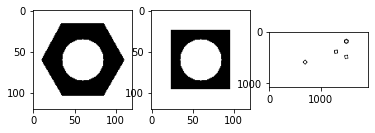

In [3]:
#In this part we do otsu thresholding
hexnut_th,bin_hex=cv.threshold(hexnut_gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
squarenut_th,bin_square=cv.threshold(squarenut_gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
conveyour_th,bin_conveyor=cv.threshold(conveyor_gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(bin_hex, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(bin_square, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(bin_conveyor, cv.COLOR_RGB2BGR))
plt.show()

 1.Carry out morphological closing to remove small holes inside the foreground. Use a 
3
×
3
 kernel. See https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html for a guide.

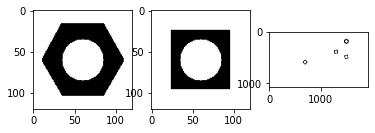

In [4]:
#Taking 3x3 kernel
kernel = cv.getStructuringElement(cv.MORPH_RECT,(3,3))
closing_hex = cv.morphologyEx(bin_hex, cv.MORPH_CLOSE, kernel)
closing_squarenut = cv.morphologyEx(bin_square, cv.MORPH_CLOSE, kernel)
closing_conveyour = cv.morphologyEx(bin_conveyor, cv.MORPH_CLOSE, kernel)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(closing_hex, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(closing_squarenut, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(closing_conveyour, cv.COLOR_RGB2BGR))
plt.show()

 1.Connected components analysis: apply the connectedComponentsWithStats function (see https://docs.opencv.org/4.5.5/d3/dc0/group__imgproc__shape.html#ga107a78bf7cd25dec05fb4dfc5c9e765f) and display the outputs as colormapped images. Answer the following questions
How many connected components are detected in each image?
What are the statistics? Interpret these statistics.
What are the centroids?
For the hexnut template, you should get the object area in pixel as approximately 4728.

In [5]:
output = cv.connectedComponentsWithStats(closing_hex,4,  cv.CV_32S)
(numLabels, labels, stats, centroids) = output
#numLabels for number of elements
for i in range(0, numLabels):
# if this is the first component then we examine the
    # *background* (typically we would just ignore this
    # component in our loop)
    if i == 0:
        text = "examining component {}/{} (background)".format(
        i + 1, numLabels)
    # otherwise, we are examining an actual connected component
    else:
        text = "examining component {}/{}".format( i + 1, numLabels)
    # print a status message update for the current connected
    # component
    print("[INFO] {}".format(text))
    # extract the connected component statistics and centroid for
    # the current label
    print('############Detected obejct :',i)
    x = stats[i, cv.CC_STAT_LEFT]
    print("Left Most :",x)
    y = stats[i, cv.CC_STAT_TOP]
    print("top Most :",y)
    w = stats[i, cv.CC_STAT_WIDTH]
    print("Width of object :",w)
    h = stats[i, cv.CC_STAT_HEIGHT]
    print('Height of object :',h)
    area = stats[i, cv.CC_STAT_AREA]
    print("Area of Object :",area)
    (cX, cY) = centroids[i]
print("Centroids of hexnut ", output[3])
print("Detected Objects= ",i+1)

[INFO] examining component 1/3 (background)
############Detected obejct : 0
Left Most : 11
top Most : 16
Width of object : 99
Height of object : 88
Area of Object : 4722
[INFO] examining component 2/3
############Detected obejct : 1
Left Most : 0
top Most : 0
Width of object : 120
Height of object : 120
Area of Object : 7717
[INFO] examining component 3/3
############Detected obejct : 2
Left Most : 35
top Most : 35
Width of object : 51
Height of object : 51
Area of Object : 1961
Centroids of hexnut  [[59.83354511 59.22257518]
 [59.168848   59.54269794]
 [60.         60.        ]]
Detected Objects=  3


In [6]:
output = cv.connectedComponentsWithStats(closing_squarenut,4,  cv.CV_32S)
(numLabels, labels, stats, centroids) = output
for i in range(0, numLabels):
# if this is the first component then we examine the
    # *background* (typically we would just ignore this
    # component in our loop)
    if i == 0:
        text = "examining component {}/{} (background)".format(
        i + 1, numLabels)
    # otherwise, we are examining an actual connected component
    else:
        text = "examining component {}/{}".format( i + 1, numLabels)
    # print a status message update for the current connected
    # component
    print("[INFO] {}".format(text))
    # extract the connected component statistics and centroid for
    # the current label
    print('############Detected obejct :',i)
    x = stats[i, cv.CC_STAT_LEFT]
    print("Left Most :",x)
    y = stats[i, cv.CC_STAT_TOP]
    print("top Most :",y)
    w = stats[i, cv.CC_STAT_WIDTH]
    print("Width of object :",w)
    h = stats[i, cv.CC_STAT_HEIGHT]
    print('Height of object :',h)
    area = stats[i, cv.CC_STAT_AREA]
    print("Area of Object :",area)
    (cX, cY) = centroids[i]
print("Centroids of Square Nut ", output[3])
print("Detected Objects= ",i+1)

[INFO] examining component 1/3 (background)
############Detected obejct : 0
Left Most : 24
top Most : 24
Width of object : 72
Height of object : 72
Area of Object : 3223
[INFO] examining component 2/3
############Detected obejct : 1
Left Most : 0
top Most : 0
Width of object : 120
Height of object : 120
Area of Object : 9216
[INFO] examining component 3/3
############Detected obejct : 2
Left Most : 35
top Most : 35
Width of object : 51
Height of object : 51
Area of Object : 1961
Centroids of Square Nut  [[59.19578033 59.19578033]
 [59.5        59.5       ]
 [60.         60.        ]]
Detected Objects=  3


In [7]:
#For conveyor Bin, doing connected component operation
output = cv.connectedComponentsWithStats(closing_conveyour,4, cv.CV_32S)
(numLabels, labels, stats, centroids) = output
for i in range(0, numLabels):
# if this is the first component then we examine the
    # *background* (typically we would just ignore this
    # component in our loop)
    if i == 0:
        text = "examining component {}/{} (background)".format(
        i + 1, numLabels)
    # otherwise, we are examining an actual connected component
    else:
        text = "examining component {}/{}".format( i + 1, numLabels)
    # print a status message update for the current connected
    # component
    print("[INFO] {}".format(text))
    # extract the connected component statistics and centroid for
    # the current label
    print('############Detected obejct :',i)
    x = stats[i, cv.CC_STAT_LEFT]
    print("Left Most :",x)
    y = stats[i, cv.CC_STAT_TOP]
    print("top Most :",y)
    w = stats[i, cv.CC_STAT_WIDTH]
    print("Width of object :",w)
    h = stats[i, cv.CC_STAT_HEIGHT]
    print('Height of object :',h)
    area = stats[i, cv.CC_STAT_AREA]
    print("Area of Object :",area)
    (cX, cY) = centroids[i]
    print("Centroid of object :",(centroids[i]))
print("Centroids of Conveyor ", output[3])
print("Detected Objects ",i+1)

[INFO] examining component 1/6 (background)
############Detected obejct : 0
Left Most : 651
top Most : 151
Width of object : 895
Height of object : 499
Area of Object : 13930
Centroid of object : [1275.02110553  400.11083991]
[INFO] examining component 2/6
############Detected obejct : 1
Left Most : 0
top Most : 0
Width of object : 1920
Height of object : 1080
Area of Object : 2051826
Centroid of object : [956.24734066 540.88404962]
[INFO] examining component 3/6
############Detected obejct : 2
Left Most : 1475
top Most : 175
Width of object : 51
Height of object : 51
Area of Object : 1961
Centroid of object : [1500.  200.]
[INFO] examining component 4/6
############Detected obejct : 3
Left Most : 1275
top Most : 375
Width of object : 51
Height of object : 51
Area of Object : 1961
Centroid of object : [1300.  400.]
[INFO] examining component 5/6
############Detected obejct : 4
Left Most : 1475
top Most : 475
Width of object : 51
Height of object : 51
Area of Object : 1961
Centroid of o

1. Contour analysis: Use findContours function to retrieve the extreme outer contours. (see https://docs.opencv.org/4.5.2/d4/d73/tutorial_py_contours_begin.html for help and https://docs.opencv.org/4.5.2/d3/dc0/group__imgproc__shape.html#gadf1ad6a0b82947fa1fe3c3d497f260e0 for information.
Display these contours. You should see something like the following:

Text(0.5, 1.0, 'Given Image')

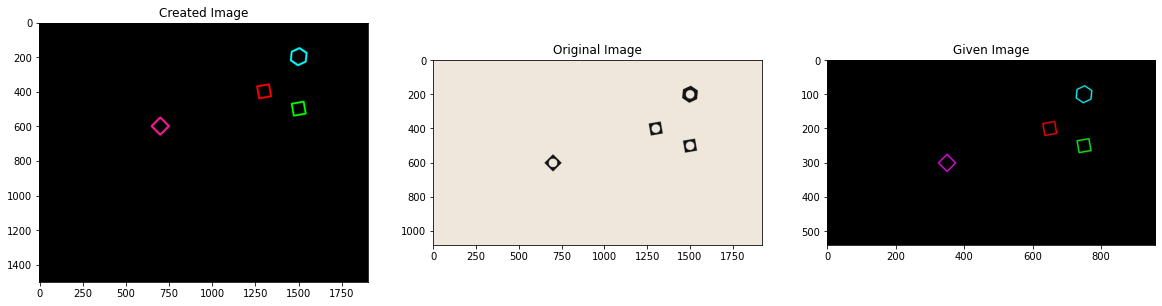

In [8]:
#for draw the contours we load the images
conveyor= cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)
marked_contours=cv.imread('contou.jpeg', cv.IMREAD_COLOR)

#Grayscaling conveyor
gray=cv.cvtColor(conveyor,cv.COLOR_BGR2GRAY)

#Inverting black to white and white to black
inverting=cv.subtract(255,gray)

#Taking the Binary Image
ret,thresh=cv.threshold(inverting,0,255,cv.THRESH_OTSU)

#Find Contours
contours,hiearachy=cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)


#Making environment to take contours

marking=np.zeros((1500,1900,3), np.uint8)
cv.drawContours(marking,contours,0,(150,25,250),10)
cv.drawContours(marking,contours,2,(0,255,0),10)
cv.drawContours(marking,contours,4,(0,0,255),10)
cv.drawContours(marking,contours,6,(255,255,0),10)

fig,ax=plt.subplots(1,3,figsize=(20,20))
ax[0].imshow(cv.cvtColor(marking,cv.COLOR_RGB2BGR))
ax[0].set_title("Created Image")
ax[1].imshow(cv.cvtColor(conveyor,cv.COLOR_RGB2BGR))
ax[1].set_title("Original Image")
ax[2].imshow(cv.cvtColor(marked_contours,cv.COLOR_RGB2BGR))
ax[2].set_title("Given Image")

# Detecting Objects on a Synthetic Conveyor

In [9]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor_result_190531L.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

In [10]:
#Find contours of hex nut
hexnut=cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
hex_gray=gray=cv.cvtColor(hexnut,cv.COLOR_BGR2GRAY)

#Inverting black to white and white to black
inverting_hex=cv.subtract(255,gray)

#Taking the Binary Image
ret,thresh_hex=cv.threshold(inverting_hex,0,255,cv.THRESH_OTSU)

#Find Contours
contours_hex,hiearachy=cv.findContours(thresh_hex, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

#for draw the contours we load the images
conveyor= cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

#Grayscaling conveyor
gray_con=cv.cvtColor(conveyor,cv.COLOR_BGR2GRAY)

#Inverting black to white and white to black
inverting_con=cv.subtract(255,gray)

#Taking the Binary Image
ret,thresh_con=cv.threshold(inverting_con,0,255,cv.THRESH_OTSU)

#Find Contours
contours_con,hiearachy_con=cv.findContours(thresh_con, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

numberofhexnut=0
thresh=0.1
for i in range(0,len(contours_con)-1):
    if i%2==0:
        ret=cv.matchShapes(contours_hex[0],contours_con[i],1,0.0)
        if ret<=thresh:
            numberofhexnut+=1
print("Number of HexNuts detected is :",numberofhexnut)

Number of HexNuts detected is : 1


In [76]:
# For Square nut
#Find contours of square nut
square=cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
square_gray=cv.cvtColor(square,cv.COLOR_BGR2GRAY)

#Inverting black to white and white to black
inverting_square=cv.subtract(255,square_gray)

#Taking the Binary Image
ret,thresh_square=cv.threshold(inverting_square,0,255,cv.THRESH_OTSU)

#Find Contours
contours_square,hiearachy=cv.findContours(thresh_square, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

#Now we have to implement a code for generate contours for frame

def framecontour(frame):
    gray_frame=cv.cvtColor(frame,cv.COLOR_BGR2GRAY) #converting frame to GrayScale Image
    invert_frame=cv.subtract(255,gray_frame)
    ret,thresh=cv.threshold(invert_frame,0,255,cv.THRESH_OTSU)
    cont_frame,heirachy=cv.findContours(thresh,cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    return cont_frame


frame_array = []

cv.namedWindow("Conveyor Belt",cv.WINDOW_NORMAL)
cap=cv.VideoCapture('conveyor.mp4')
f=0
frames=[]
numberofobjects=0
while cap.isOpened():
    objects=0
    ret,frame=cap.read()
    if ret==False:
        break
    contours=framecontour(frame)
    for i in range (0,len(contours)):
        hex_ret=cv.matchShapes(contours_hex[0],contours[i],1,0.0)
        squ_ret=cv.matchShapes(contours_square[0],contours[i],1,0.0)
        if (hex_ret<=0.05 or squ_ret<=0.05) and ((cv.contourArea(contours[i])<4980 and cv.contourArea(contours[i])>4650) or (cv.contourArea(contours[i])<6250 and cv.contourArea(contours[i])>5750)):
            objects=objects+1
            #using moments to get centroids and then we count total number of objects
            M = cv.moments(contours[i])
            cx = int(M['m10']/M['m00'])
            cy = int(M['m01']/M['m00'])
            if 999<=cx and cx<=1029.5:
                numberofobjects+=1
    f=f+1
    counttext="Frame No: " +str(f)+"  Objects on Conveyor Belt: "+str(objects) + "  Total Counted Objects :" +str(numberofobjects)
       #Putting Text on Video Clip
    cv.putText(frame,counttext,(250,250),cv.FONT_ITALIC,1,(255,0,0),2)
    frame=cv.resize(frame,(1000,500))
    frame_array.append(frame)
    cv.imshow("Conveyor",frame)
    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()    
            
                
shape = (1080, 1920, 3)

# Your code here


out = cv.VideoWriter('./conveyor_result_190528J.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
 
for i in range(len(frame_array)):
    cv.imshow('Frame', frame_array[i])
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frame_array[i])

out.release()
cv.destroyAllWindows()